# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [11]:
from sklearn.datasets import load_svmlight_file

X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()

array([2., 2., 2., 2., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 4., 4., 2.,
       2., 4., 2., 4., 4., 2., 2., 4., 2., 2., 2., 2., 2., 2., 4., 2., 2.,
       2., 4., 2., 4., 4., 4., 4., 4., 4., 2., 4., 2., 2., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 2., 4., 4., 2., 4., 2., 4., 4., 2.,
       2., 4., 2., 4., 4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4.,
       4., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 4., 4., 4., 4., 2., 4.,
       4., 4., 4., 4., 2., 4., 2., 4., 4., 4., 2., 2., 2., 4., 2., 2., 2.,
       2., 4., 4., 4., 2., 4., 2., 4., 2., 2., 2., 4., 2., 2., 2., 2., 2.,
       2., 2., 2., 4., 2., 2., 4., 2., 2., 4., 2., 4., 4., 2., 2., 4., 2.,
       2., 4., 4., 2., 2., 2., 2., 4., 4., 2., 2., 2., 2., 2., 4., 4., 4.,
       2., 4., 2., 4., 2., 2., 2., 4., 4., 2., 4., 4., 4., 2., 4., 4., 2.,
       2., 2., 2., 2., 2., 2., 2., 4., 4., 2., 2., 2., 4., 4., 2., 2., 2.,
       4., 4., 2., 4., 4., 4., 2., 2., 4., 2., 2., 4., 4., 4., 4., 2., 4.,
       4., 2., 4., 4., 4.

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1.

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [15]:
import numpy as np
y = np.where(y == 2,-1,y)
y = np.where(y == 4,1,y)
min = np.min(X,axis=0)
max = np.max(X,axis=0)
X = (X - min) / (max - min)

In [16]:
X

array([[0.06994635, 0.44444444, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       [0.07016441, 0.44444444, 0.33333333, ..., 0.22222222, 0.11111111,
        0.        ],
       [0.07109638, 0.22222222, 0.        , ..., 0.22222222, 0.        ,
        0.        ],
       ...,
       [0.06164188, 0.44444444, 1.        , ..., 0.77777778, 1.        ,
        0.11111111],
       [0.06228791, 0.33333333, 0.77777778, ..., 1.        , 0.55555556,
        0.        ],
       [0.06228791, 0.33333333, 0.77777778, ..., 1.        , 0.33333333,
        0.        ]])

In [17]:
y

array([-1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1.,  1.,
       -1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1., -1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,
        1.,  1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1.,  1., -1.,
       -1., -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,
        1., -1., -1., -1., -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1., -1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,  1.,
        1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,  1

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

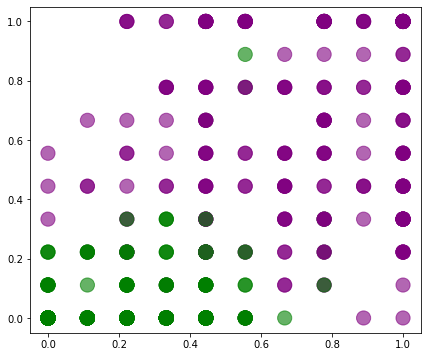

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,6)
z = np.where(y==1,"purple","green")
plt.scatter(X[:,1],X[:,2],s=200,c=z,alpha=0.6)

### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [41]:
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
pred = lin_reg.fit(X,y)

### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

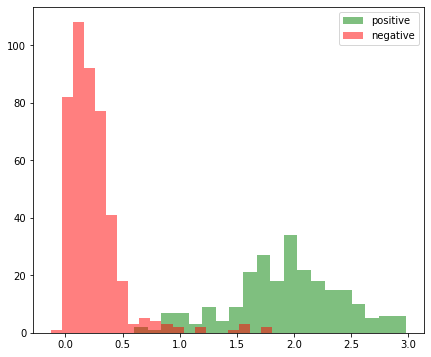

In [42]:
def predict(X,coeffs):
    return X @ coeffs
X_positive = np.delete(X, np.where(y == -1),axis=0)
X_negative = np.delete(X, np.where(y == 1),axis=0)

def plot_hist(pred1,pred2):
    plt.hist(pred1,bins=20,color="green",alpha=0.5,label="positive")
    plt.hist(pred2,bins=20,color="red",alpha=0.5,label="negative")
    plt.legend()
    plt.show()
plot_hist(predict(X_positive,pred.coef_),predict(X_negative,pred.coef_))

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [ ]:
beta = pred.coef_
classification = np.where(X @ beta > 0, 1, -1)
print(np.sum(classification == 1)/ (np.sum(classification == 1) + np.sum(classification == -1)))

### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']